### Dataset: US News Best Countries 2021
##### https://www.kaggle.com/datasets/prasertk/us-news-best-countries-2021

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import DBSCAN

In [263]:
country_data = pd.read_csv('us_news_best_countries_2021.csv')
country_data.head()

rank      country  agility  entrepreneurship  quality of life  movers  \
0     1       Canada        3                 6                1      46   
1     2        Japan        7                 1               13       6   
2     3      Germany        4                 2                9      39   
3     4  Switzerland       14                 7                5      21   
4     5    Australia        2                12                6      18   

   social purpose  cultural influence  open for business  power  adventure  \
0               1                  14                  3     12         19   
1              20                   5                 26      6         28   
2              11                   9                 18      4         47   
3               9                   8                  1     17         13   
4               8                  16                 12     16          8   

   heritage  
0        33  
1        10  
2        27  
3        21  
4        23

In [264]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rank                78 non-null     int64 
 1   country             78 non-null     object
 2   agility             78 non-null     int64 
 3   entrepreneurship    78 non-null     int64 
 4   quality of life     78 non-null     int64 
 5   movers              78 non-null     int64 
 6   social purpose      78 non-null     int64 
 7   cultural influence  78 non-null     int64 
 8   open for business   78 non-null     int64 
 9   power               78 non-null     int64 
 10  adventure           78 non-null     int64 
 11  heritage            78 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 7.4+ KB


In [265]:
country_data_copy=country_data.drop(['country'],axis=1)

In [266]:
country_data_copy.head()

rank  agility  entrepreneurship  quality of life  movers  social purpose  \
0     1        3                 6                1      46               1   
1     2        7                 1               13       6              20   
2     3        4                 2                9      39              11   
3     4       14                 7                5      21               9   
4     5        2                12                6      18               8   

   cultural influence  open for business  power  adventure  heritage  
0                  14                  3     12         19        33  
1                   5                 26      6         28        10  
2                   9                 18      4         47        27  
3                   8                  1     17         13        21  
4                  16                 12     16          8        23

<AxesSubplot:>

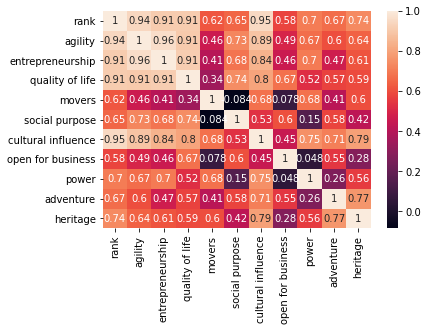

In [267]:
sns.heatmap(country_data_copy.corr(), annot=True)

##### 1. entrepreneurship is highly correlated with agility, quality of life, and cultural influence
##### 2. cultural influence is highly correlated with agility and quality of life

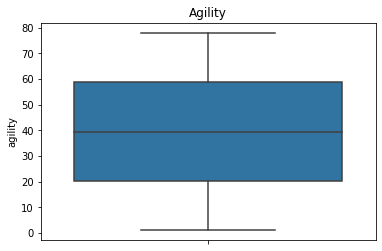

In [268]:
bp=sns.boxplot(y=country_data_copy.agility).set_title('Agility')

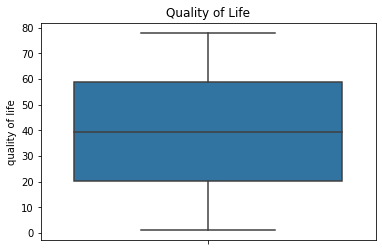

In [269]:
bp=sns.boxplot(y=country_data_copy['quality of life']).set_title('Quality of Life')

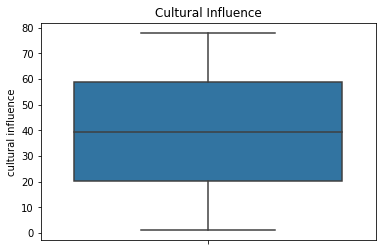

In [270]:
bp=sns.boxplot(y=country_data_copy['cultural influence']).set_title('Cultural Influence')

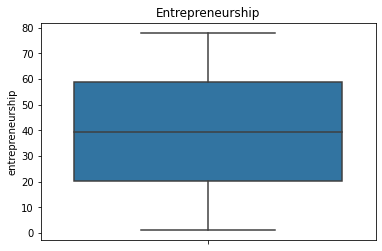

In [271]:
bp=sns.boxplot(y=country_data_copy['entrepreneurship']).set_title('Entrepreneurship')

#### Scaling Data

In [272]:
scaler = StandardScaler()
scaled = scaler.fit_transform(country_data_copy)

In [273]:
scaled_df = pd.DataFrame(scaled, columns=country_data_copy.columns)
scaled_df.head()

rank   agility  entrepreneurship  quality of life    movers  \
0 -1.709986 -1.621155         -1.487910        -1.709986  0.288699   
1 -1.665570 -1.443494         -1.709986        -1.177003 -1.487910   
2 -1.621155 -1.576740         -1.665570        -1.354664 -0.022208   
3 -1.576740 -1.132588         -1.443494        -1.532325 -0.821681   
4 -1.532325 -1.665570         -1.221418        -1.487910 -0.954927   

   social purpose  cultural influence  open for business     power  adventure  \
0       -1.709986           -1.132588          -1.621155 -1.221418  -0.910512   
1       -0.866097           -1.532325          -0.599605 -1.487910  -0.510775   
2       -1.265833           -1.354664          -0.954927 -1.576740   0.333114   
3       -1.354664           -1.399079          -1.709986 -0.999342  -1.177003   
4       -1.399079           -1.043757          -1.221418 -1.043757  -1.399079   

   heritage  
0 -0.288699  
1 -1.310249  
2 -0.555190  
3 -0.821681  
4 -0.732851

### K-Means

In [274]:
inertia = []
clusters = range(2,21)

for i in clusters:
    kmean=KMeans(n_clusters=i, init = 'k-means++')
    kmean.fit(scaled_df)
    inertia.append(kmean.inertia_)

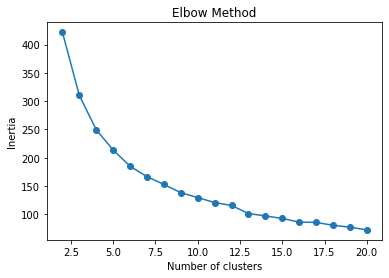

In [275]:
plt.plot(clusters,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##### Elbow appears to lie somewhere between 5 and 10

In [276]:
silhouette = []
for i in clusters:
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(scaled_df[features], labels, metric = 'euclidean'))

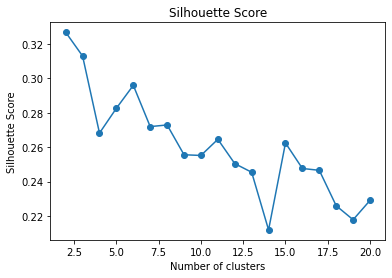

In [277]:
plt.plot(clusters,silhouette,marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### We can assume k = 6

In [293]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans.fit(scaled_df)

KMeans(n_clusters=6, random_state=42)

In [294]:
cluster_labels = kmeans.fit_predict(scaled_df)

In [295]:
pd.Series(kmeans.labels_).value_counts()

2    21
3    15
1    13
4    12
0    10
5     7
dtype: int64

### Silhouette Score

In [296]:
from sklearn import metrics

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.3284486995887851

#### Making Predictions

In [297]:
predictions = kmeans.labels_

In [298]:
kmeans_pred = pd.DataFrame(country_data)
kmeans_pred['Kmeans_Clusters'] = predictions
kmeans_pred.head()

rank      country  agility  entrepreneurship  quality of life  movers  \
0     1       Canada        3                 6                1      46   
1     2        Japan        7                 1               13       6   
2     3      Germany        4                 2                9      39   
3     4  Switzerland       14                 7                5      21   
4     5    Australia        2                12                6      18   

   social purpose  cultural influence  open for business  power  adventure  \
0               1                  14                  3     12         19   
1              20                   5                 26      6         28   
2              11                   9                 18      4         47   
3               9                   8                  1     17         13   
4               8                  16                 12     16          8   

   heritage  Kmeans_Clusters  
0        33                2  
1        10                2  
2        27                2  
3        21                2  
4        23                2

### Visualizing Results

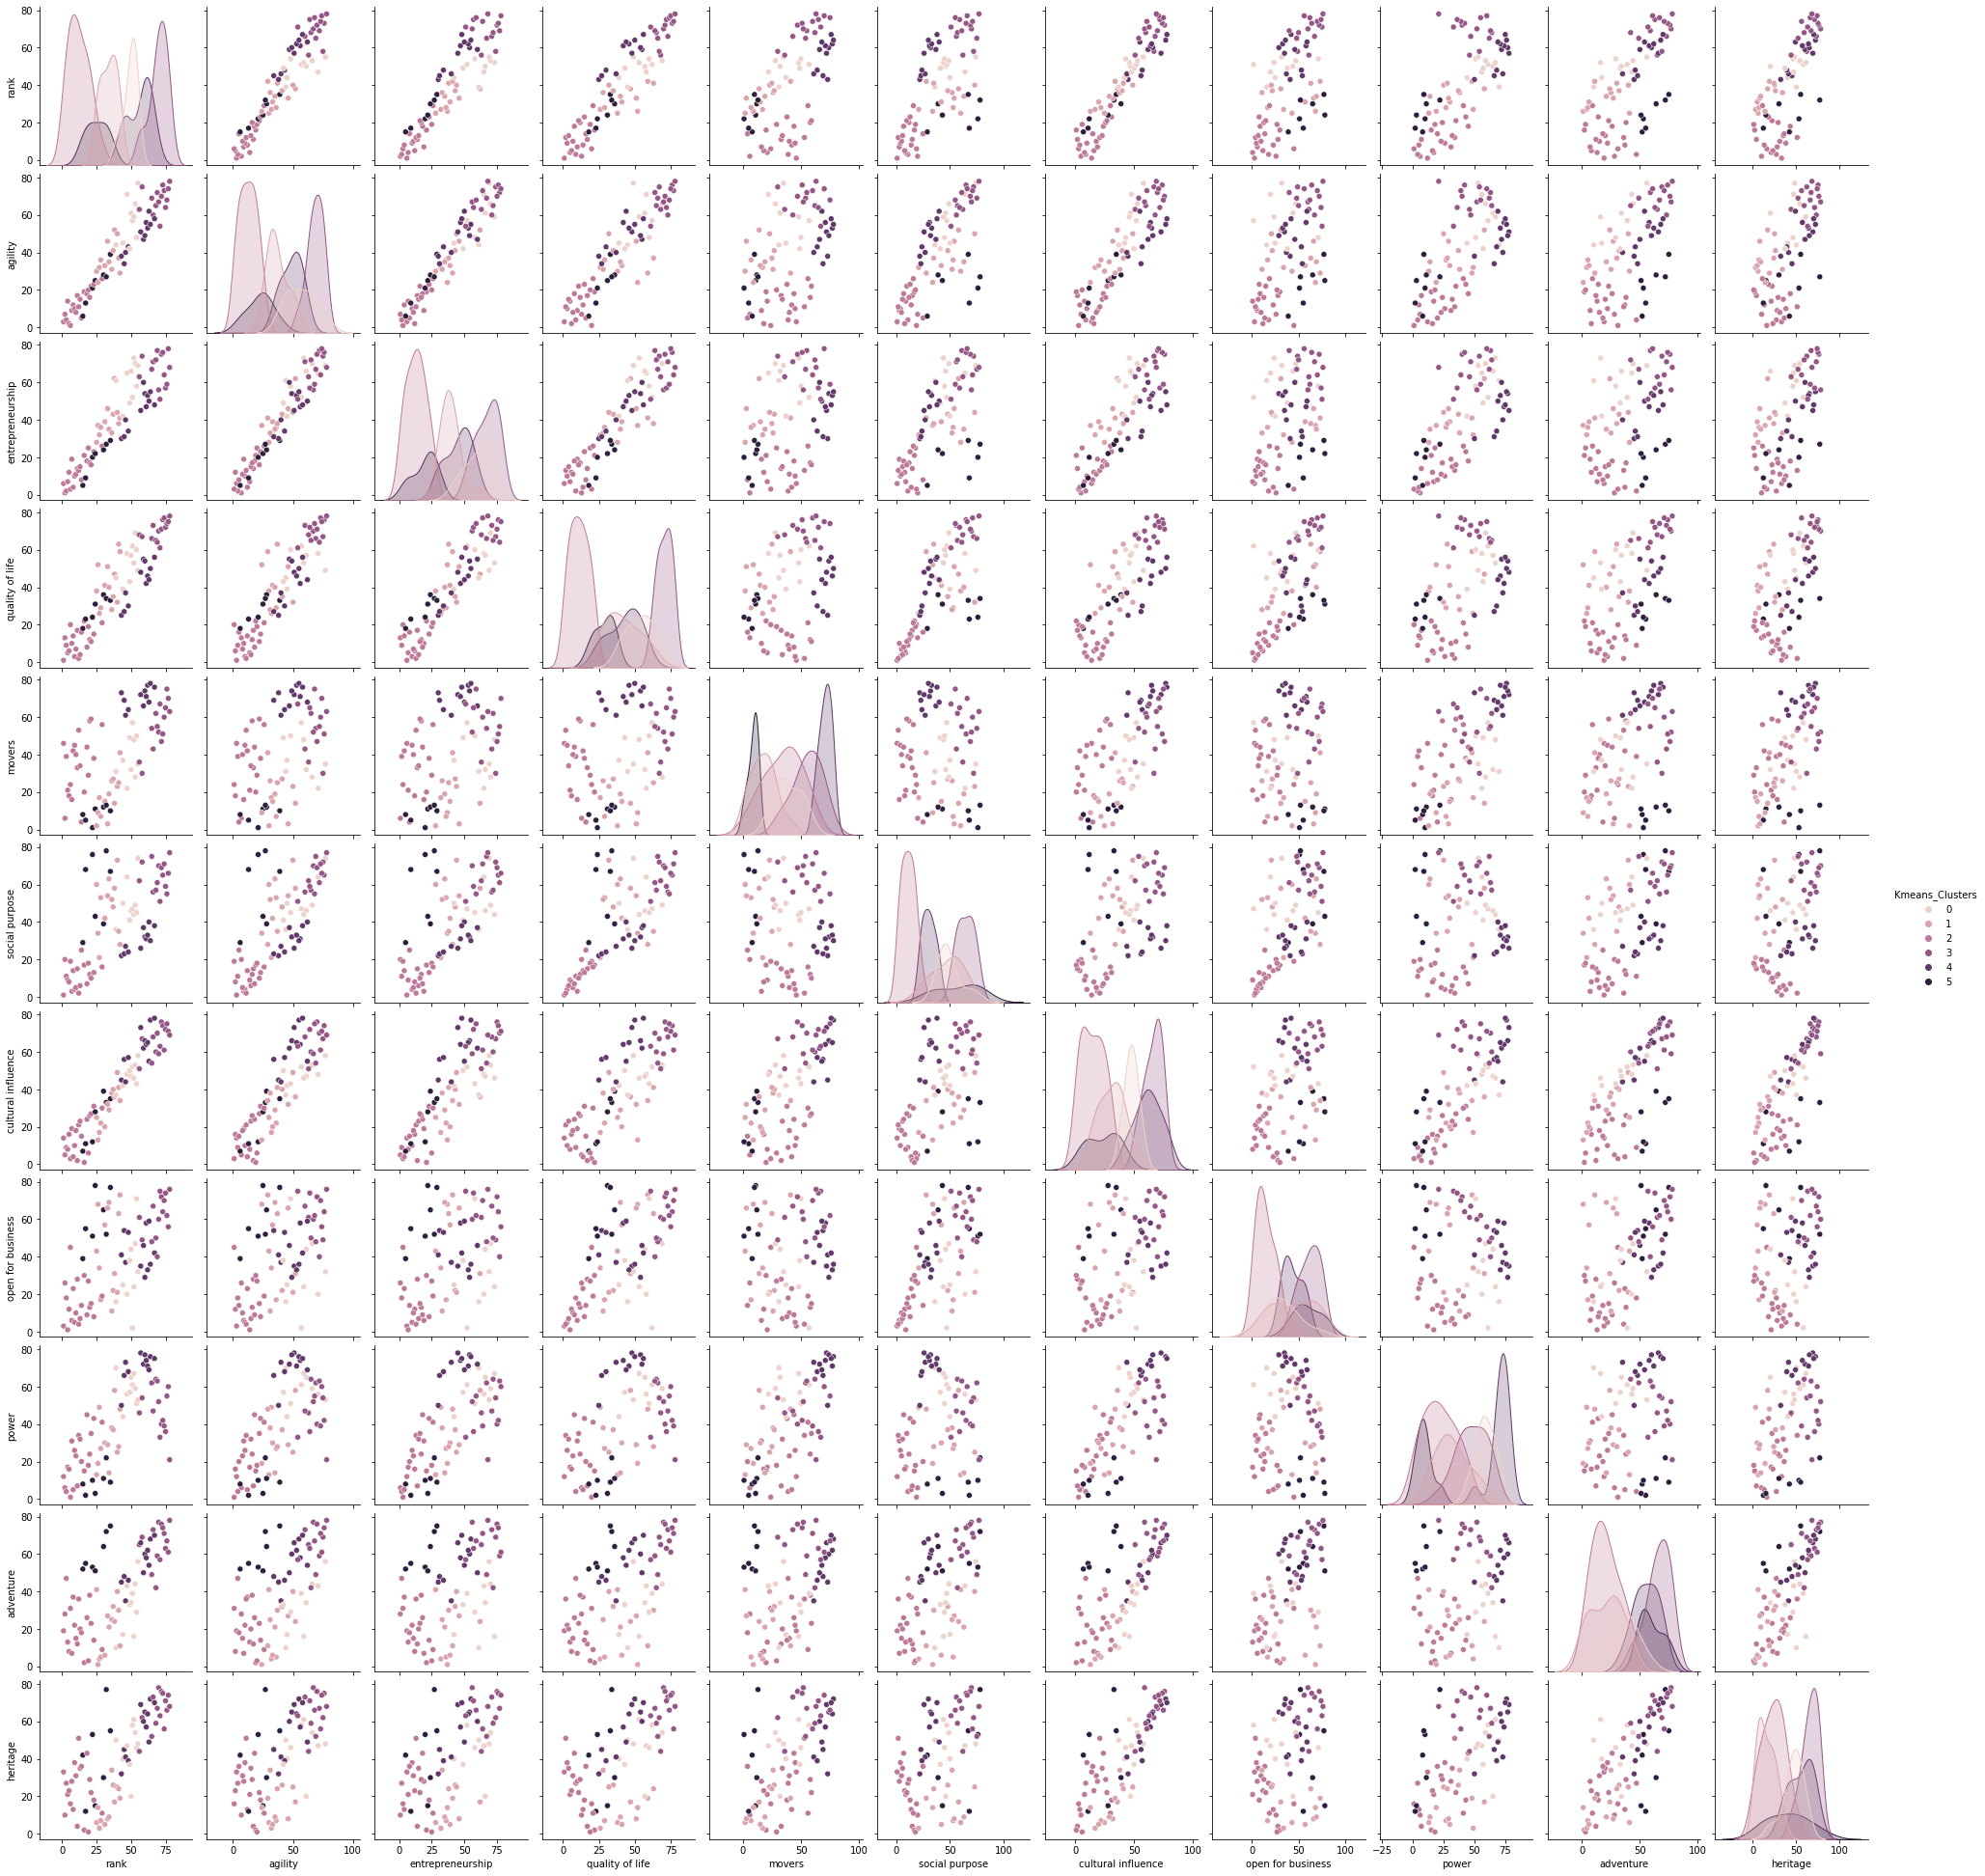

In [299]:
sns.pairplot(kmeans_pred, hue="Kmeans_Clusters")

In [300]:
countries1 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 0]['country']
countries2 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 1]['country']
countries3 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 2]['country']
countries4 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 3]['country']
countries5 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 4]['country']
countries6 = kmeans_pred[kmeans_pred['Kmeans_Clusters'] == 5]['country']

In [303]:
countries3

0             Canada
1              Japan
2            Germany
3        Switzerland
4          Australia
5      United States
6        New Zealand
7     United Kingdom
8             Sweden
9        Netherlands
10            France
11           Denmark
12            Norway
13         Singapore
15             Italy
17           Finland
18             Spain
19           Belgium
20           Austria
22           Ireland
28          Portugal
Name: country, dtype: object

In [304]:
countries4

55         Jordan
57        Myanmar
64        Tunisia
65     Azerbaijan
67        Ecuador
68      Guatemala
69           Oman
70        Ukraine
71     Kazakhstan
72     Uzbekistan
73        Lebanon
74        Belarus
75         Serbia
76    El Salvador
77           Iraq
Name: country, dtype: object

## Hierarchical Clustering

In [182]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

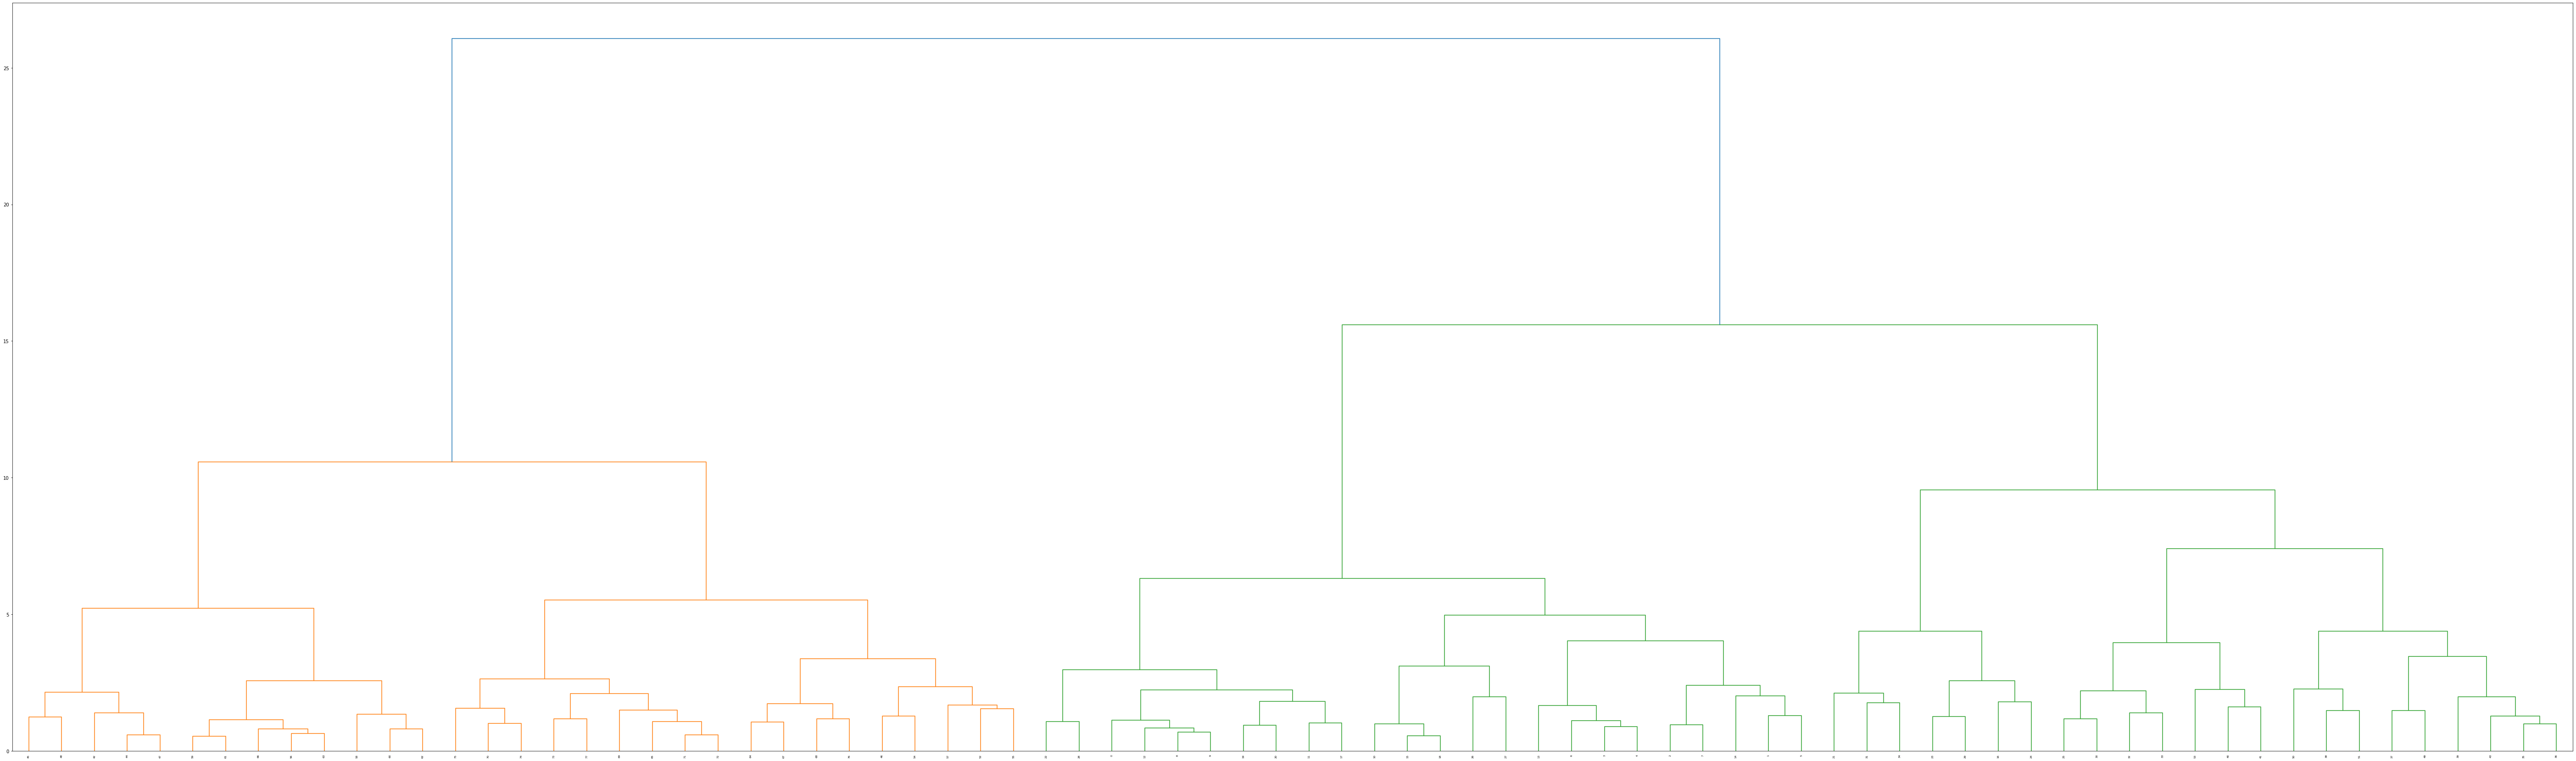

In [188]:
plt.figure(figsize=(100,30))
dendogram = hcluster.dendrogram(hcluster.linkage(scaled_df, method='ward'))

#### According to dendogram, the optimal number of clusters is 2

In [189]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [190]:
hcluster_pred = pd.DataFrame(country_data)
hcluster_pred['Hierarchical_Clusters'] = hcluster_label
hcluster_pred.head()

rank      country  agility  entrepreneurship  quality of life  movers  \
0     1       Canada        3                 6                1      46   
1     2        Japan        7                 1               13       6   
2     3      Germany        4                 2                9      39   
3     4  Switzerland       14                 7                5      21   
4     5    Australia        2                12                6      18   

   social purpose  cultural influence  open for business  power  adventure  \
0               1                  14                  3     12         19   
1              20                   5                 26      6         28   
2              11                   9                 18      4         47   
3               9                   8                  1     17         13   
4               8                  16                 12     16          8   

   heritage  Hierarchical_Clusters  
0        33                      0  
1        10                      0  
2        27                      0  
3        21                      0  
4        23                      0

### Silhouette Score

In [292]:
hcluster_score = silhouette_score(scaled_df, hcluster_label)
hcluster_score

0.3683883825235874

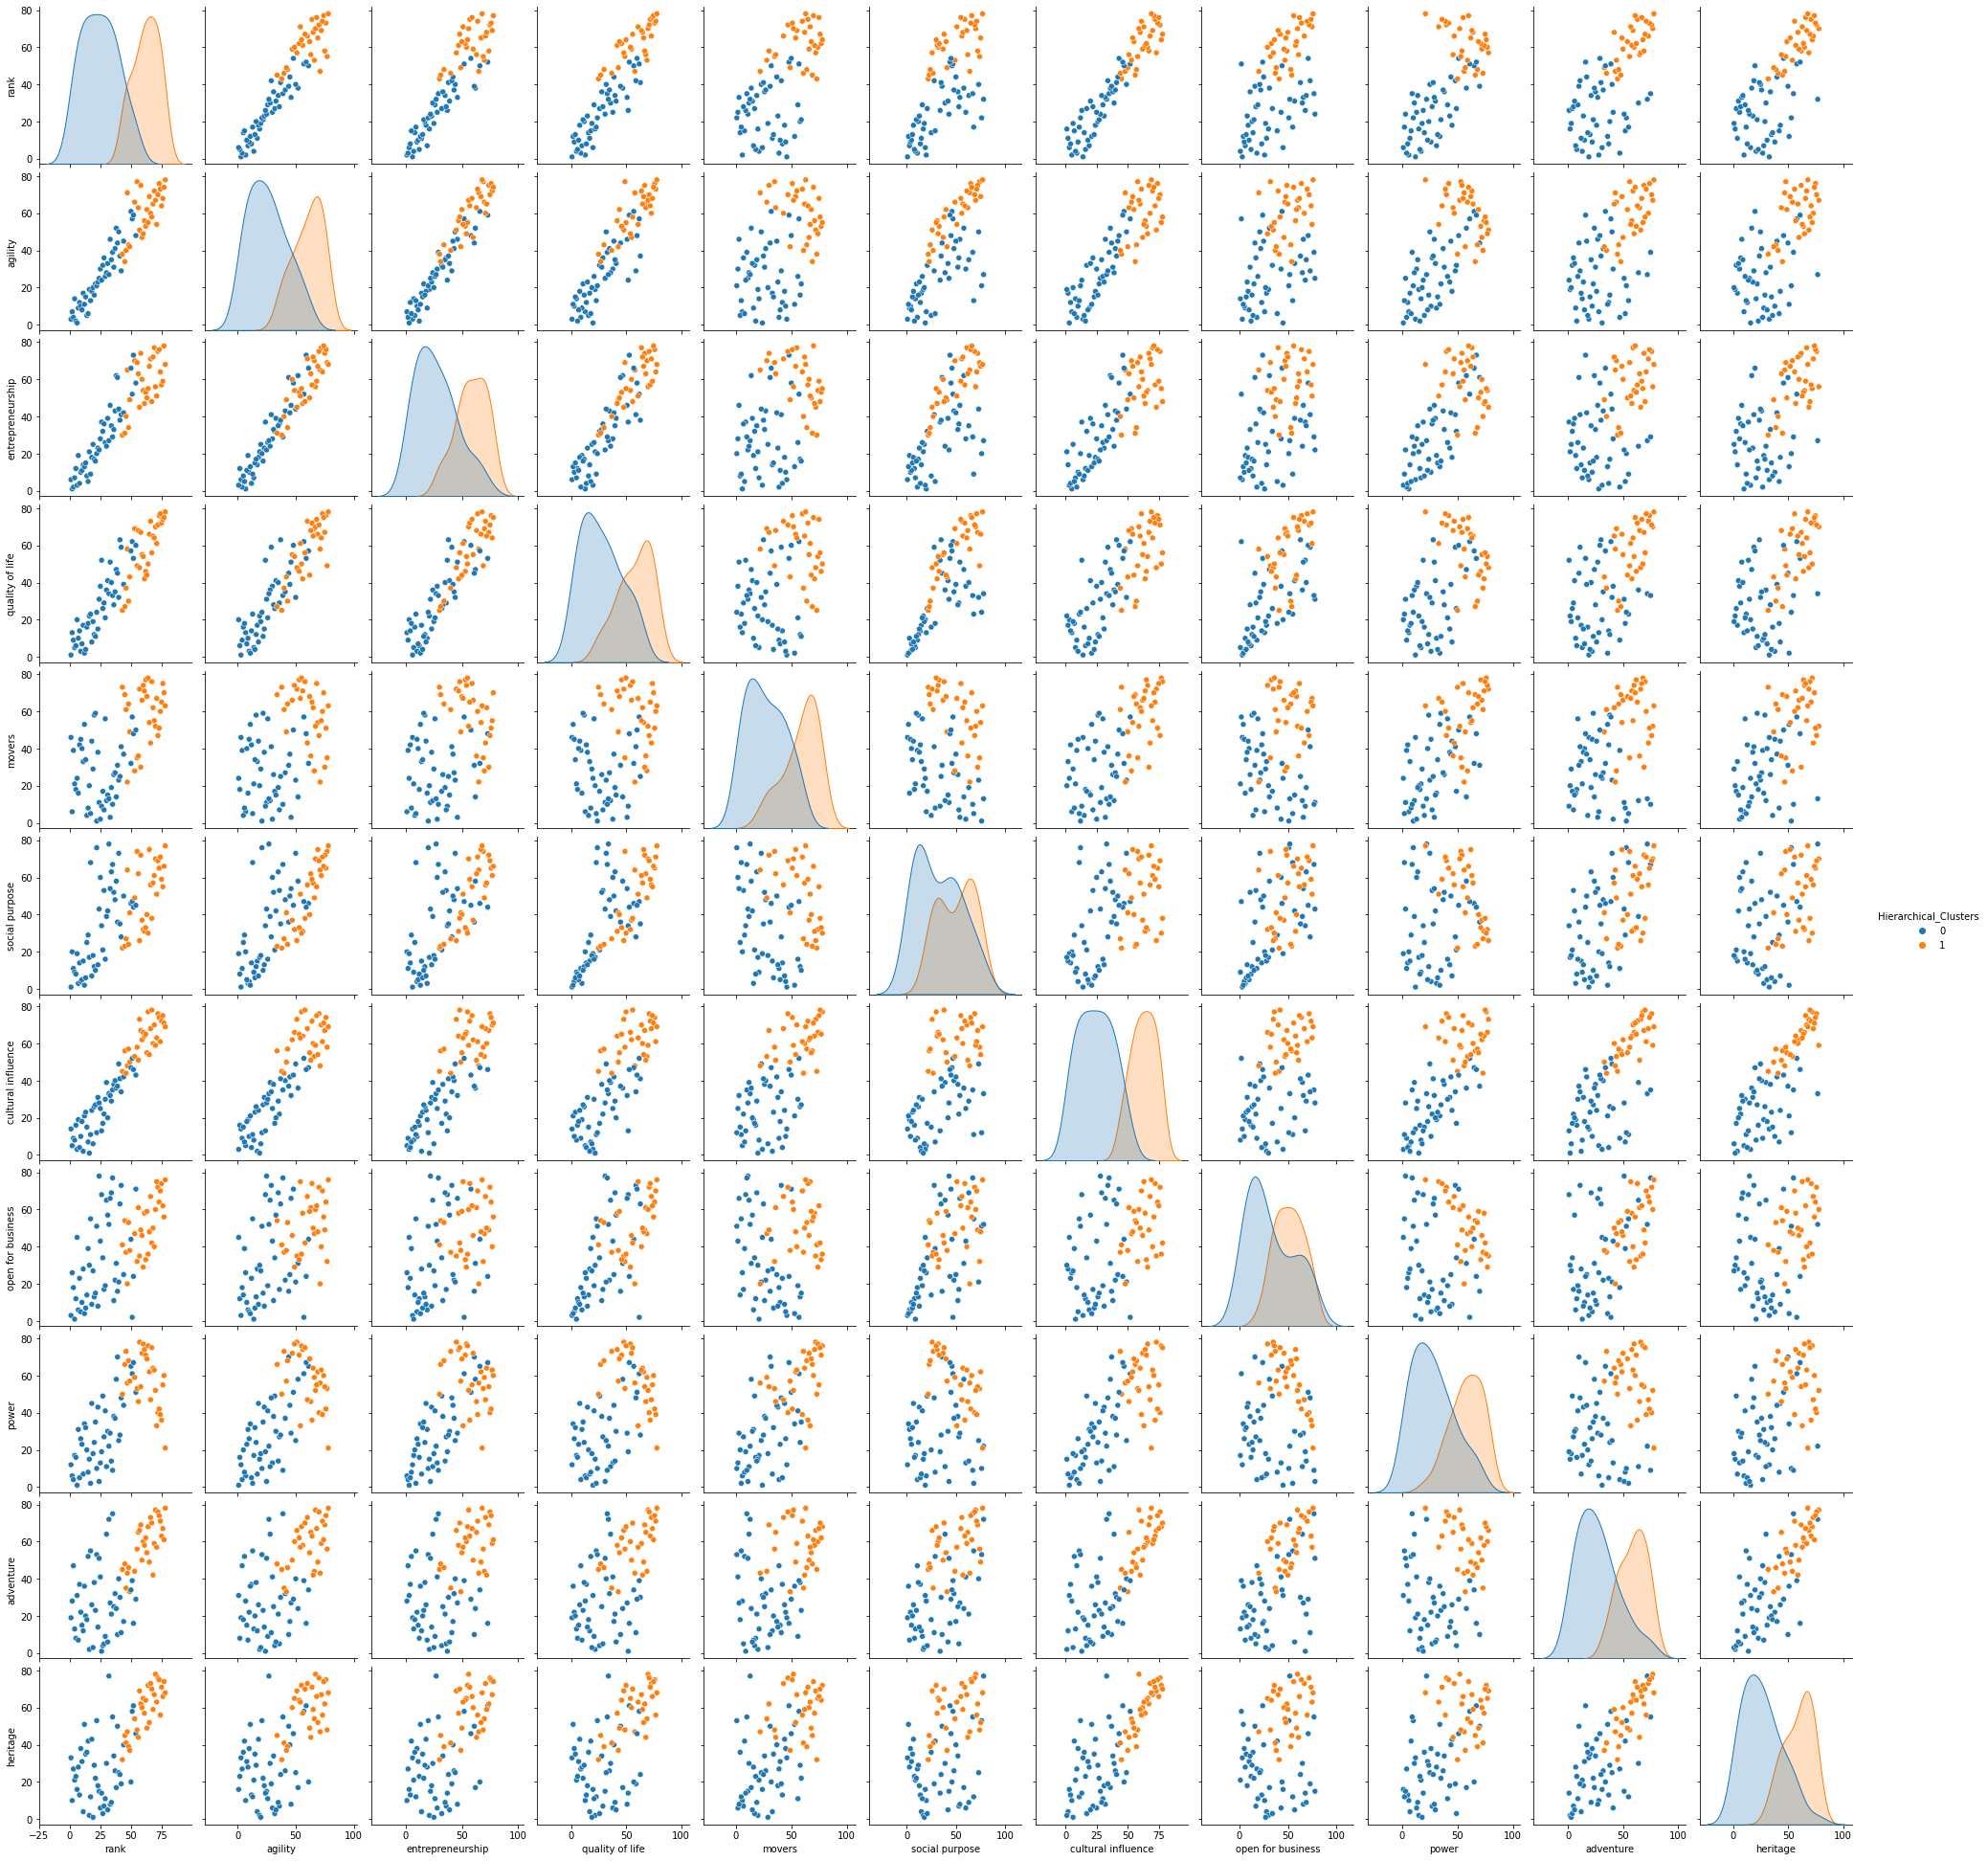

In [192]:
sns.pairplot(hcluster_pred, hue="Hierarchical_Clusters")

In [193]:
countries1_hcluster = hcluster_pred[hcluster_pred['Hierarchical_Clusters'] == 0]['country']
countries2_hcluster = hcluster_pred[hcluster_pred['Hierarchical_Clusters'] == 1]['country']

In [196]:
countries1_hcluster

0                   Canada
1                    Japan
2                  Germany
3              Switzerland
4                Australia
5            United States
6              New Zealand
7           United Kingdom
8                   Sweden
9              Netherlands
10                  France
11                 Denmark
12                  Norway
13               Singapore
14             South Korea
15                   Italy
16                   China
17                 Finland
18                   Spain
19                 Belgium
20                 Austria
21    United Arab Emirates
22                 Ireland
23                  Russia
24                   India
25                  Brazil
26                  Greece
27                Thailand
28                Portugal
29                  Israel
30                  Mexico
31                   Qatar
32                   Egypt
33                  Turkey
34            Saudi Arabia
35                Malaysia
36               Indonesia
3

In [197]:
countries2_hcluster

42         Poland
44        Czechia
45        Croatia
46      Sri Lanka
47        Hungary
48          Chile
52          Kenya
54       Cambodia
55         Jordan
56        Estonia
57        Myanmar
58        Uruguay
59       Slovenia
60       Bulgaria
61       Slovakia
62        Romania
63         Latvia
64        Tunisia
65     Azerbaijan
66      Lithuania
67        Ecuador
68      Guatemala
69           Oman
70        Ukraine
71     Kazakhstan
72     Uzbekistan
73        Lebanon
74        Belarus
75         Serbia
76    El Salvador
77           Iraq
Name: country, dtype: object

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

##### If your data has more than 2 dimensions, choose MinPts = 2*dim, where (Sander et al., 1998).
##### Method to determine best eps value(Nadia Rahmah et al., 2016)

In [254]:
dbscan = DBSCAN(eps = 60, min_samples=20)
dbscan_labels = dbscan.fit_predict(country_data_copy)

In [255]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,
       -1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

### Silhouette Score

In [256]:
dbscan_score = silhouette_score(scaled_df, dbscan_labels)
dbscan_score

0.35012161316106083

In [257]:
dbscan_pred = pd.DataFrame(country_data)
dbscan_pred['DBSCAN_Clusters'] = dbscan_labels
dbscan_pred.head()

rank      country  agility  entrepreneurship  quality of life  movers  \
0     1       Canada        3                 6                1      46   
1     2        Japan        7                 1               13       6   
2     3      Germany        4                 2                9      39   
3     4  Switzerland       14                 7                5      21   
4     5    Australia        2                12                6      18   

   social purpose  cultural influence  open for business  power  adventure  \
0               1                  14                  3     12         19   
1              20                   5                 26      6         28   
2              11                   9                 18      4         47   
3               9                   8                  1     17         13   
4               8                  16                 12     16          8   

   heritage  Hierarchical_Clusters  DBSCAN_Clusters  
0        33                      0                0  
1        10                      0                0  
2        27                      0                0  
3        21                      0                0  
4        23                      0                0

C:\Users\aksha\OneDrive\Documents\ml_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aksha\OneDrive\Documents\ml_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


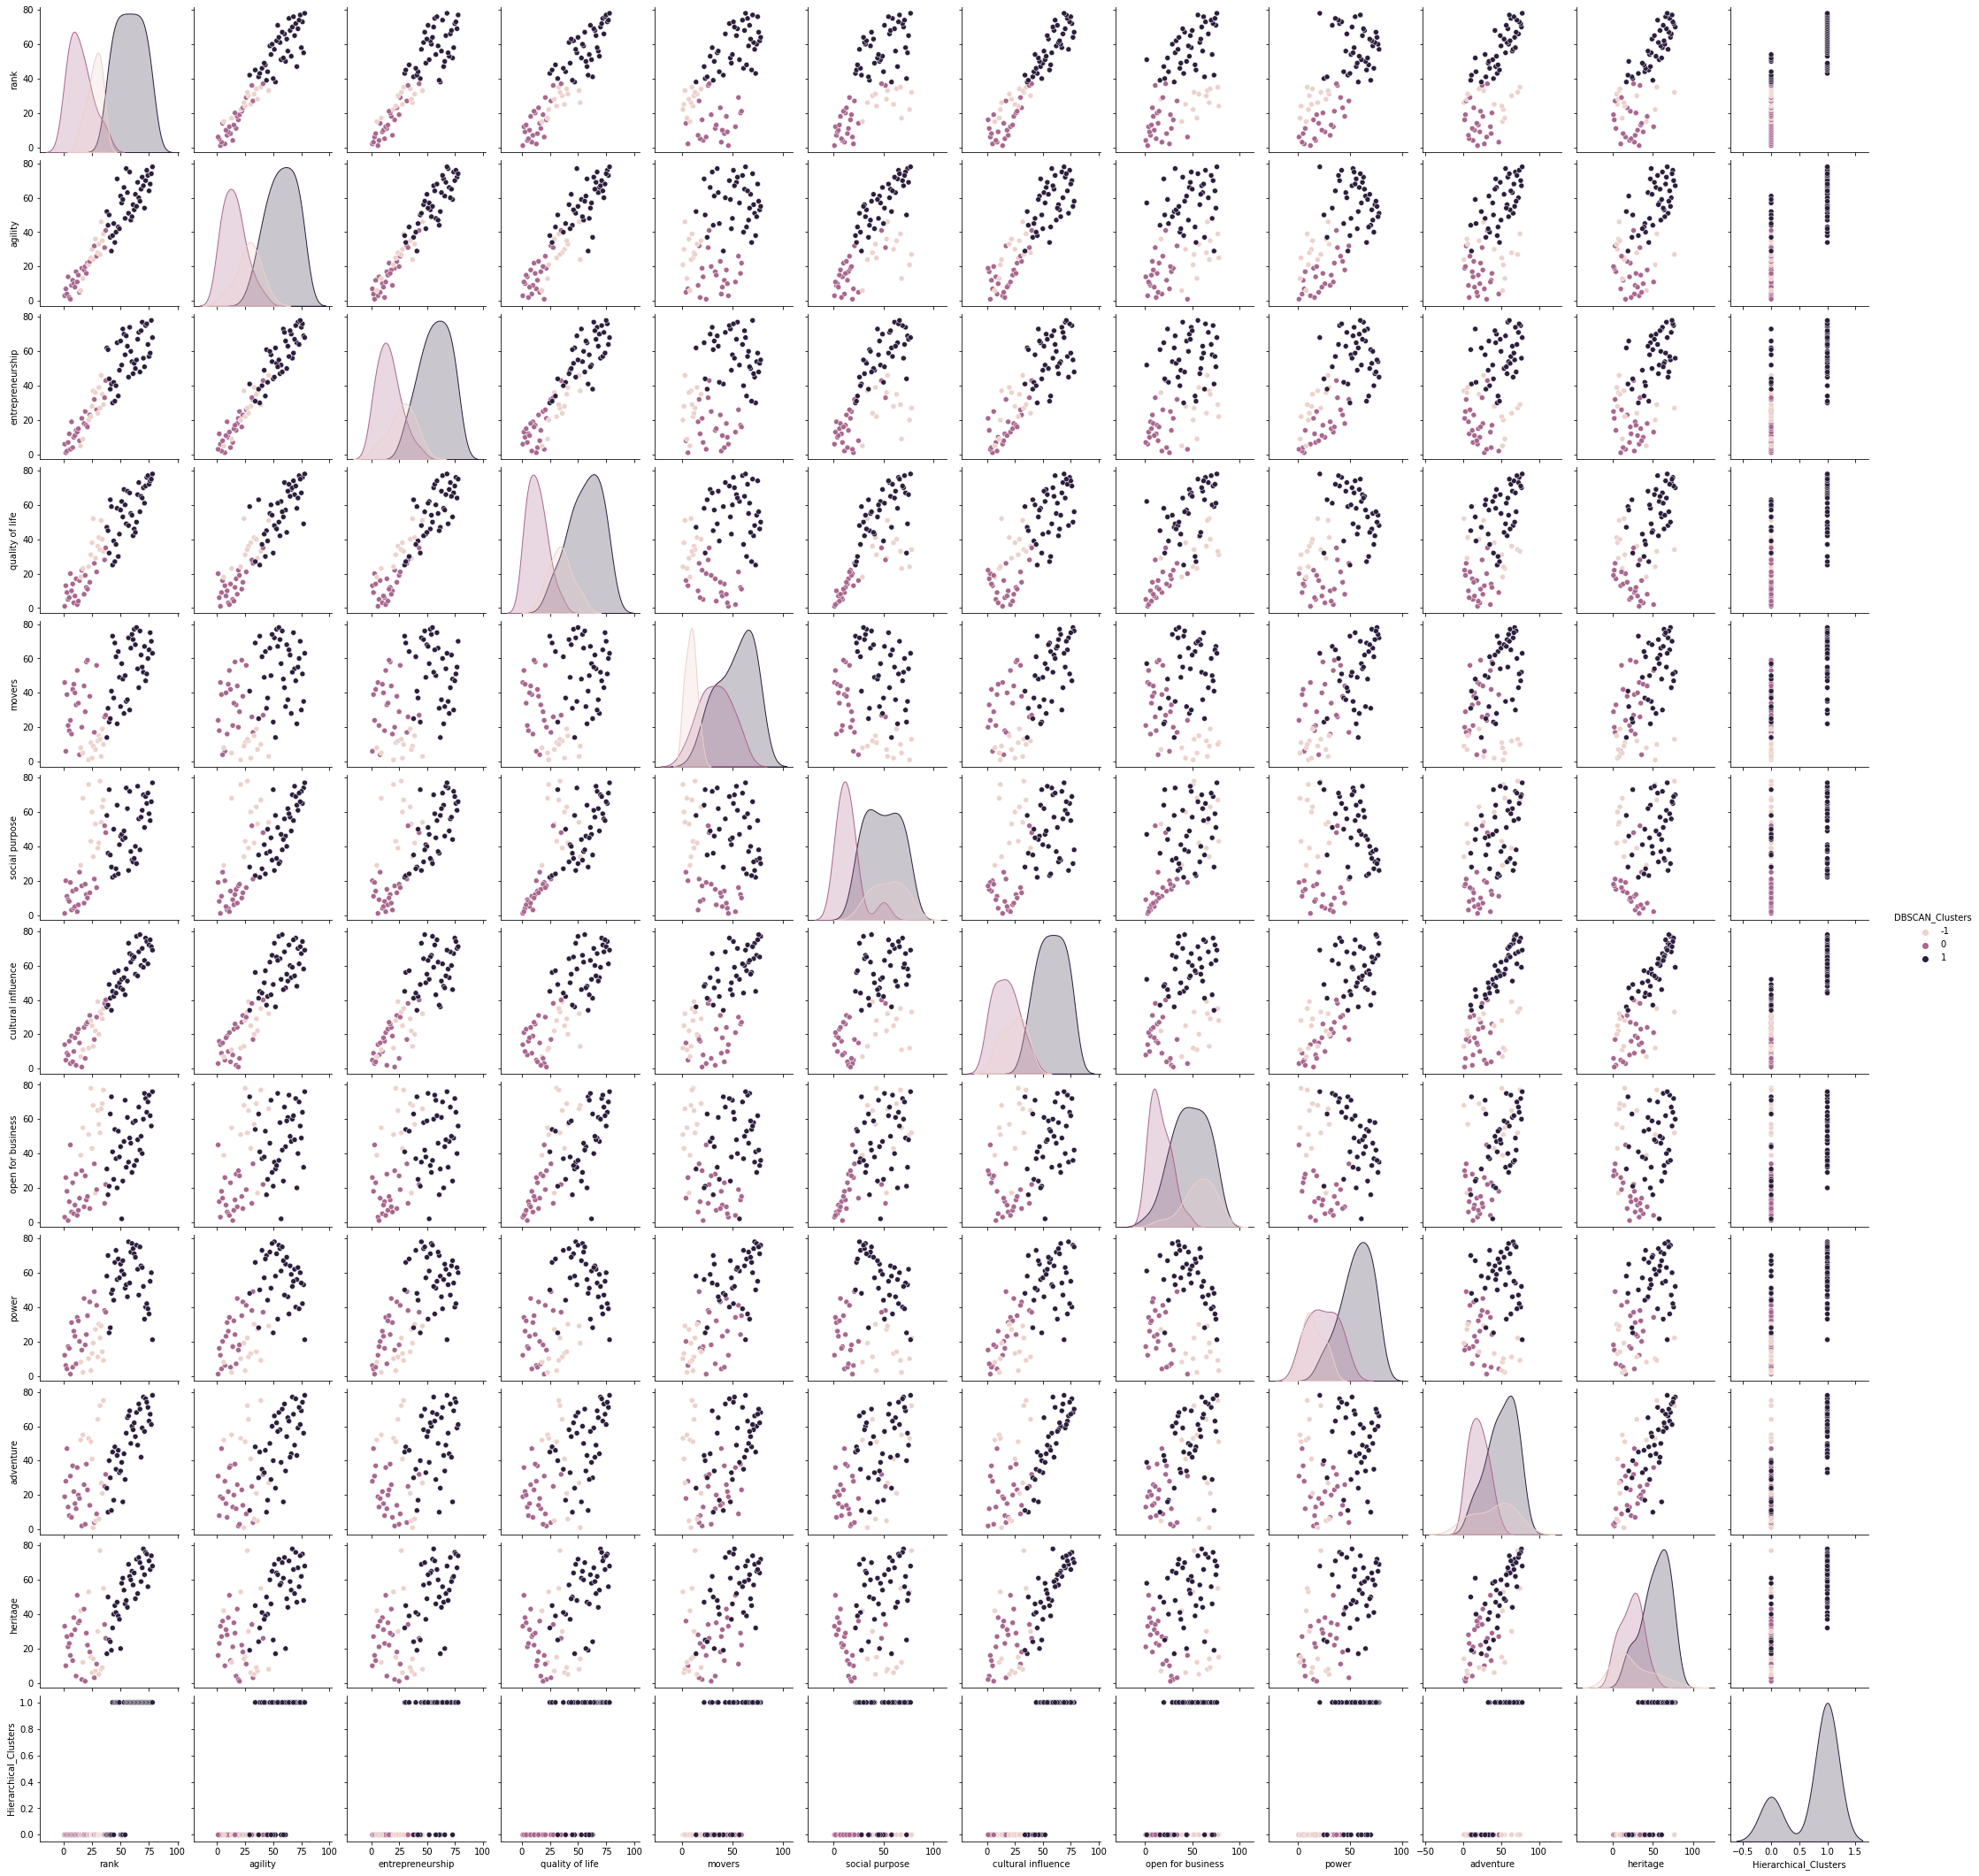

In [291]:
sns.pairplot(dbscan_pred, hue="DBSCAN_Clusters")

In [258]:
countries1_dbscan = dbscan_pred[dbscan_pred['DBSCAN_Clusters'] == -1]['country']
countries2_dbscan = dbscan_pred[dbscan_pred['DBSCAN_Clusters'] == 0]['country']
countries3_dbscan = dbscan_pred[dbscan_pred['DBSCAN_Clusters'] == 1]['country']

In [259]:
countries1_dbscan

14             South Korea
16                   China
21    United Arab Emirates
23                  Russia
24                   India
25                  Brazil
27                Thailand
29                  Israel
30                  Mexico
31                   Qatar
32                   Egypt
33                  Turkey
34            Saudi Arabia
Name: country, dtype: object

In [260]:
countries2_dbscan

0             Canada
1              Japan
2            Germany
3        Switzerland
4          Australia
5      United States
6        New Zealand
7     United Kingdom
8             Sweden
9        Netherlands
10            France
11           Denmark
12            Norway
13         Singapore
15             Italy
17           Finland
18             Spain
19           Belgium
20           Austria
22           Ireland
26            Greece
28          Portugal
35          Malaysia
36         Indonesia
Name: country, dtype: object

In [261]:
countries3_dbscan

37               Morocco
38            Costa Rica
39               Vietnam
40          South Africa
41             Argentina
42                Poland
43           Philippines
44               Czechia
45               Croatia
46             Sri Lanka
47               Hungary
48                 Chile
49                  Peru
50                Panama
51    Dominican Republic
52                 Kenya
53              Colombia
54              Cambodia
55                Jordan
56               Estonia
57               Myanmar
58               Uruguay
59              Slovenia
60              Bulgaria
61              Slovakia
62               Romania
63                Latvia
64               Tunisia
65            Azerbaijan
66             Lithuania
67               Ecuador
68             Guatemala
69                  Oman
70               Ukraine
71            Kazakhstan
72            Uzbekistan
73               Lebanon
74               Belarus
75                Serbia
76           El Salvador
